In [34]:
# Definition of cubic polynomial fit for wavelength solution

In [2]:
# Eqn. (7) in Brandt+ 2017 JATIS is only appropriate for grid of spectra

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

%matplotlib inline

In [10]:
# fake spectrum
stem_spec = '/Users/bandari/Documents/git.repos/rrlfe/src/model_spectra/rrmods_all/original_ascii_files'
spec_fake = pd.read_csv(stem_spec + '/700020m30.smo', delim_whitespace=True, names=['wavel','flux','noise'])

In [11]:
# for a given wavelength, these are the coordinates of the pixels and lenslets

'''
nx, ny = (10, 10)
x = np.linspace(0, 200, nx)
y = np.linspace(0, 200, ny)
xv, yv = np.meshgrid(x, y)

input_x_coords = xv
input_y_coords = yv

N_data_pts = nx*ny
'''

N_data_pts = 100

input_wavel = np.linspace(3900.,5299.,num=N_data_pts)

# pixel x values
input_x_coords = np.linspace(0.,1000.,num=N_data_pts)
# pixel y values
input_y_coords = np.linspace(30.,20.,num=N_data_pts)

# lenslet/channel coords
channel_i_coords = np.arange(0,N_data_pts)
channel_j_coords = np.arange(0,N_data_pts)

In [13]:
xy_coords = (input_x_coords.flatten(),input_y_coords.flatten())
channel_coords = (channel_i_coords,channel_j_coords)

In [14]:
# simple linear fit 

def func(x, coeff_0, coeff_1):
    
    #xij = 
    #yij = b0 + b1*coords[1]
    
    return coeff_0*x + coeff_1

In [42]:
x_fake = np.linspace(0,10,30)
y_fake = 5.*x_fake + 3. + np.random.normal(0.01)

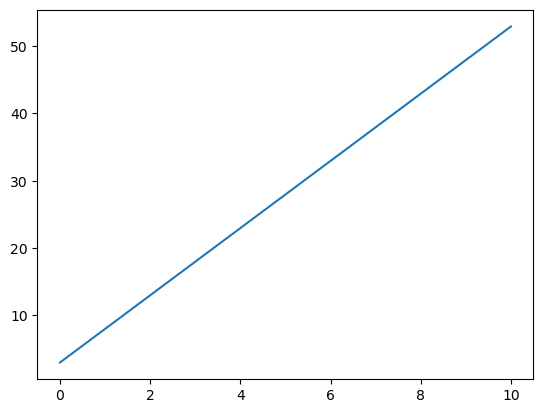

In [51]:
plt.plot(x_fake,y_fake)
plt.show()

In [15]:
# do the fit

p0 = 1.+np.ones((N_data_pts))
popt_x, pcov_x = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[0], p0=np.array([-0.1,30]))
popt_y, pcov_y = curve_fit(func, xdata=channel_coords[1], ydata=xy_coords[1], p0=np.array([10,0]))

In [59]:
def test_func(x, m, b):
    
    return m*x + b

popt_test, pcov_test = curve_fit(test_func, x_fake, y_fake, p0=np.array([5.,3.]))

In [53]:
popt_test

array([5.        , 2.94890604])

In [16]:
# best-fit x,y

j_vals = channel_coords[1]
x_best = popt_x[0]*j_vals + popt_x[1]
y_best = popt_y[0]*j_vals + popt_y[1]

In [56]:
popt_x

array([ 1.01010101e+01, -9.96565412e-08])

In [57]:
popt_y

array([-0.1010101, 30.       ])

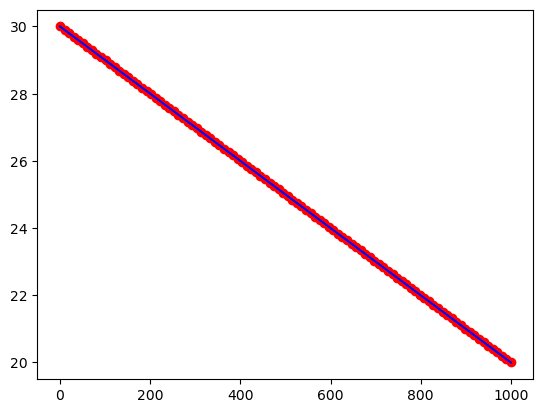

In [18]:
#plt.scatter(channel_coords[1], xy_coords[0])
plt.scatter(x_best,y_best,color='red')
plt.plot(input_x_coords,input_y_coords,color='blue')
plt.show()

In [40]:
plt.scatter(input_x_coords,input_y_coords,linestyle='',s=5,color='blue')
plt.scatter(x_best,y_best,linestyle='',s=5,color='red')
#plt.plot(xy_coords[0],)
plt.show()

In [20]:
print(popt_x)
print(popt_y)

[394.49810973 105.50189027]
[112.5 -87.5]


In [ ]:
#######

In [8]:
def func(coords, 
         a00, a10, a20, a30, a01, a11, a21, a02, a12, a03,
         b00, b10, b20, b30, b01, b11, b21, b02, b12, b03):
    
    m0_term = a00 + a10*np.power(coords[1],1) + a20*np.power(coords[1],2) + a30*np.power(coords[1],3)
    m1_term = a01*np.power(coords[0],1) + a11*np.power(coords[0],1)*np.power(coords[1],1) + a21*np.power(coords[0],1)*np.power(coords[1],2)
    m2_term = a02*np.power(coords[0],2) + a12*np.power(coords[0],2)*np.power(coords[1],1)
    m3_term = a03*np.power(coords[0],3)
    
    #x_pix, y_pix = coords
    
    return m0_term + m1_term + m2_term + m3_term

In [9]:
# make fake data
a00, a10, a20, a30, a01, a11, a21, a02, a12, a03=1,1,1,1,1,1,1,1,1,1
b00, b10, b20, b30, b01, b11, b21, b02, b12, b03=1,1,1,1,1,1,1,1,1,1

z = func(coords=lenslet_coords, 
         a00=a00, a10=a10, a20=a20, a30=a30, a01=a01, a11=a11, a21=a21, a02=a02, a12=a12, a03=a03,
         b00=b00, b10=b10, b20=b20, b30=b30, b01=b01, b11=b11, b21=b21, b02=b02, b12=b12, b03=b03,
        ) * 1 + np.random.random(len(xy_coords[0])) / 100

In [10]:
# do the fit
p0 = 1.+np.random.normal(scale=0.1,size=20)
popt, pcov = curve_fit(func, lenslet_coords, z, p0)

/Users/bandari/anaconda3/envs/extract_env/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [11]:
print('p0',p0)
print('--------')
print('popt',popt)

p0 [1.16494585 0.94399566 0.87750306 0.91242153 1.09196681 1.08879794
 0.92296904 0.9543012  0.95878913 0.91997918 1.00396946 1.10119955
 1.08621754 0.95911401 0.96119886 1.03208635 0.91921285 0.7894568
 0.78243226 1.0347086 ]
--------
popt [1.00606917 0.9384884  0.97365988 0.83751669 1.06151853 1.11948413
 1.10501775 0.90685446 0.93670446 1.12076111 1.00396946 1.10119955
 1.08621754 0.95911401 0.96119886 1.03208635 0.91921285 0.7894568
 0.78243226 1.0347086 ]


In [11]:
a00, a10, a20, a30, a01, a11, a21, a02, a12, a03=popt[:10]
b00, b10, b20, b30, b01, b11, b21, b02, b12, b03=popt[10:]

In [ ]:
# now map the x,y to wavelength

